In [250]:
# Import library python
import pandas as pd # Untuk manipulasi dan analisis data
import numpy as np # Untuk komputasi numerik
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Untuk visualisasi data yang lebih estetis
from sklearn.preprocessing import MinMaxScaler

In [251]:
# Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [252]:
# Membaca atau menghubungkan direktori folder dataset yang ada di google drive
path = "/content/gdrive/MyDrive/Datasets/DS/"

In [253]:
# Membaca dan menampilkan file
df = pd.read_csv(path + '2016-weather.csv')

# df.head(10)
df

,Date/Time,Month,Mean Temp,Total Precip (mm),Total Snow (cm),Snow on Grnd (cm)
0,2016-01-01,1,-10.1,0.0,0.0,50.0
1,2016-01-02,1,-9.3,0.0,0.0,49.0
2,2016-01-03,1,-10.8,0.0,NaN,46.0
3,2016-01-04,1,-8.4,0.0,NaN,NaN
4,2016-01-05,1,NaN,1.4,NaN,44.0
...,...,...,...,...,...,...
361,2016-12-27,12,-3.5,2.0,NaN,81.0
362,2016-12-28,12,-0.5,3.4,6.2,78.0
363,2016-12-29,12,-0.8,19.6,NaN,78.0
364,2016-12-30,12,-2.0,0.0,0.0,98.0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          366 non-null    object 
 1   Month              366 non-null    int64  
 2   Mean Temp          331 non-null    float64
 3   Total Precip (mm)  356 non-null    float64
 4   Total Snow (cm)    107 non-null    float64
 5   Snow on Grnd (cm)  335 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.3+ KB


In [255]:
df.describe()

,Month,Mean Temp,Total Precip (mm),Total Snow (cm),Snow on Grnd (cm)
count,366.000000,331.000000,356.000000,107.000000,335.000000
mean,6.513661,7.133535,4.051966,1.318692,15.044776
std,3.455958,7.884795,7.844048,4.414879,23.488456
min,1.000000,-14.800000,0.000000,0.000000,0.000000
25%,4.000000,1.900000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,0.600000,0.000000,0.000000
75%,9.750000,13.500000,4.200000,0.000000,34.000000
max,12.000000,22.800000,66.000000,29.400000,98.000000


In [256]:
df.duplicated().sum()

np.int64(0)

In [257]:
df.isnull().sum()

,0
Date/Time,0
Month,0
Mean Temp,35
Total Precip (mm),10
Total Snow (cm),259
Snow on Grnd (cm),31


In [258]:
df.columns = ["Tanggal", "Bulan", "Suhu_RataRata", "Total_Curah_Hujan", "Total_Salju", "Salju_DiTanah"]
df.head()

,Tanggal,Bulan,Suhu_RataRata,Total_Curah_Hujan,Total_Salju,Salju_DiTanah
0,2016-01-01,1,-10.1,0.0,0.0,50.0
1,2016-01-02,1,-9.3,0.0,0.0,49.0
2,2016-01-03,1,-10.8,0.0,NaN,46.0
3,2016-01-04,1,-8.4,0.0,NaN,NaN
4,2016-01-05,1,NaN,1.4,NaN,44.0


In [259]:
# Mengubah tipe data kolom tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

In [260]:
# Menampilkan hari-hari dengan suhu di bawah 4 derajat Celsius
df_suhu = df[df["Suhu_RataRata"] < 4.0]
df_suhu

,Tanggal,Bulan,Suhu_RataRata,Total_Curah_Hujan,Total_Salju,Salju_DiTanah
0,2016-01-01,1,-10.1,0.0,0.0,50.0
1,2016-01-02,1,-9.3,0.0,0.0,49.0
2,2016-01-03,1,-10.8,0.0,NaN,46.0
3,2016-01-04,1,-8.4,0.0,NaN,NaN
5,2016-01-06,1,-4.0,0.0,NaN,45.0
...,...,...,...,...,...,...
361,2016-12-27,12,-3.5,2.0,NaN,81.0
362,2016-12-28,12,-0.5,3.4,6.2,78.0
363,2016-12-29,12,-0.8,19.6,NaN,78.0
364,2016-12-30,12,-2.0,0.0,0.0,98.0


In [261]:
# Menampilkan data untuk bulan November
df_bulan = df[df["Bulan"] == 11]
df_bulan.head()

,Tanggal,Bulan,Suhu_RataRata,Total_Curah_Hujan,Total_Salju,Salju_DiTanah
305,2016-11-01,11,5.0,11.8,NaN,0.0
306,2016-11-02,11,5.3,25.4,NaN,0.0
307,2016-11-03,11,5.8,1.4,0.0,0.0
308,2016-11-04,11,6.5,27.4,0.0,0.0
309,2016-11-05,11,7.8,9.0,NaN,0.0


In [262]:
# Rata-rata nilai tiap kolom per bulan
df_rata_perbulan = df.groupby("Bulan").mean(numeric_only=True)
df_rata_perbulan

,Suhu_RataRata,Total_Curah_Hujan,Total_Salju,Salju_DiTanah
Bulan,,,,
1,-2.432143,6.051613,4.730000,52.666667
2,1.511111,7.234483,0.140000,50.448276
3,4.046429,7.230000,0.076923,24.071429
4,9.896154,1.551724,0.000000,0.000000
5,12.546154,1.880000,0.000000,0.000000
6,13.747826,2.837037,0.000000,0.000000
7,16.303846,0.948387,0.000000,0.000000
8,17.720690,0.938710,0.000000,0.000000
9,11.707143,1.000000,0.000000,0.000000


In [263]:
df.isnull().sum()

,0
Tanggal,0
Bulan,0
Suhu_RataRata,35
Total_Curah_Hujan,10
Total_Salju,259
Salju_DiTanah,31


#Handling Missing Values

In [264]:
# Kolom Suhu_RataRata (musiman)
df['Suhu_RataRata'] = df.groupby('Bulan')['Suhu_RataRata'].transform(lambda x: x.fillna(x.mean()))

# Kolom Total_Curah_Hujan (diisi 0)
df['Total_Curah_Hujan'] = df['Total_Curah_Hujan'].fillna(0)

# Kolom Total_Salju (diisi 0)
df['Total_Salju'] = df['Total_Salju'].fillna(0)

# Kolom Salju_DiTanah (musiman)
df['Salju_DiTanah'] = df.groupby('Bulan')['Salju_DiTanah'].transform(lambda x: x.fillna(x.mean()))

TAMBAHAN

Buat diagram (plot) yang menunjukkan
1. Rata2 suhu harian selama setahun
2. Ketebalan salju selama setahun

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tanggal            366 non-null    datetime64[ns]
 1   Bulan              366 non-null    int64         
 2   Suhu_RataRata      366 non-null    float64       
 3   Total_Curah_Hujan  366 non-null    float64       
 4   Total_Salju        366 non-null    float64       
 5   Salju_DiTanah      366 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 17.3 KB


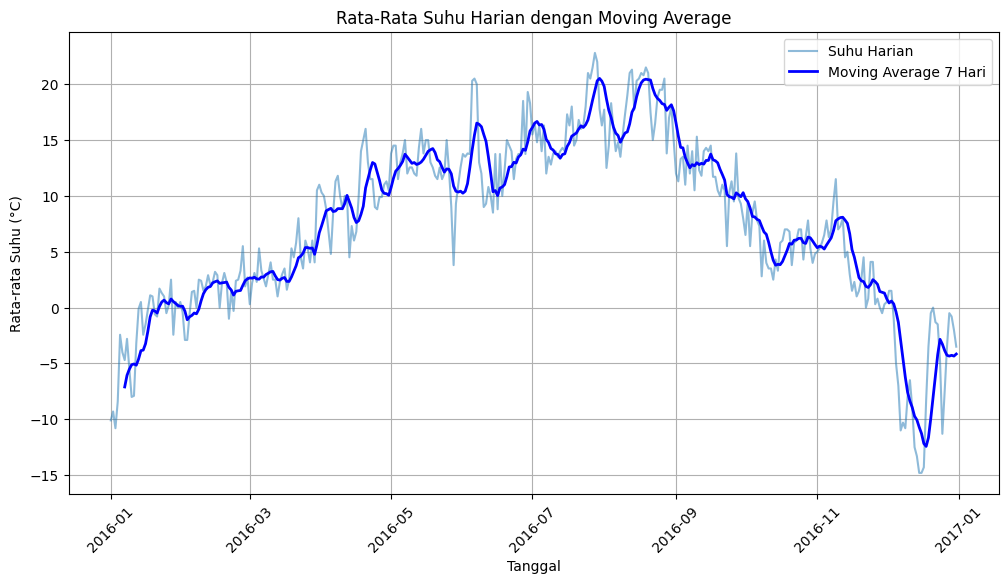

In [266]:
# Mengitung Moving Average 7 Hari
df['Suhu_MA7'] = df['Suhu_RataRata'].rolling(window=7).mean()

# Plot suhu harian
plt.figure(figsize=(12, 6))
plt.plot(df['Tanggal'], df['Suhu_RataRata'], label='Suhu Harian', alpha=0.5)

# Plot Moving Average 7 Hari
plt.plot(df['Tanggal'], df['Suhu_MA7'], label='Moving Average 7 Hari', color='blue', linewidth=2)

# Visualisasi
plt.xticks(rotation=45)
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Suhu (°C)")
plt.title("Rata-Rata Suhu Harian dengan Moving Average")
plt.legend()
plt.grid(True)
plt.show()

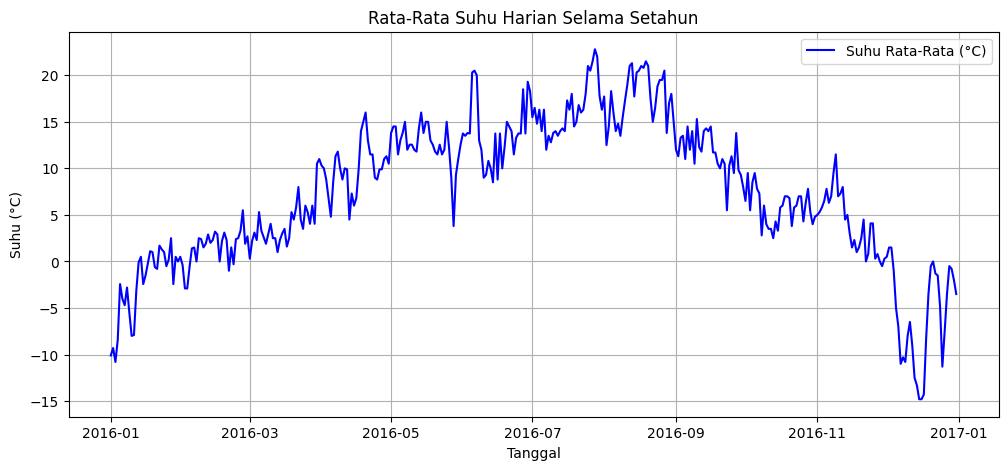

In [267]:
# Rata-Rata Suhu harian selama setahun
plt.figure(figsize=(12, 5))
plt.plot(df["Tanggal"], df["Suhu_RataRata"], label="Suhu Rata-Rata (°C)", color="blue")
plt.xlabel("Tanggal")
plt.ylabel("Suhu (°C)")
plt.title("Rata-Rata Suhu Harian Selama Setahun")
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Tanggal'>

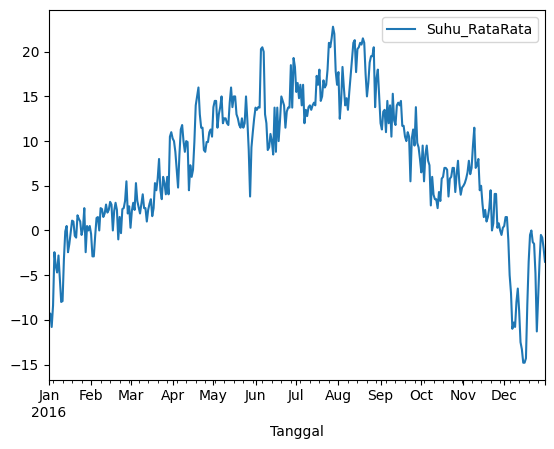

In [268]:
# Diagram Plot Rata-Rata suhu harian selama setahun
df.plot(x='Tanggal', y='Suhu_RataRata', kind='line')

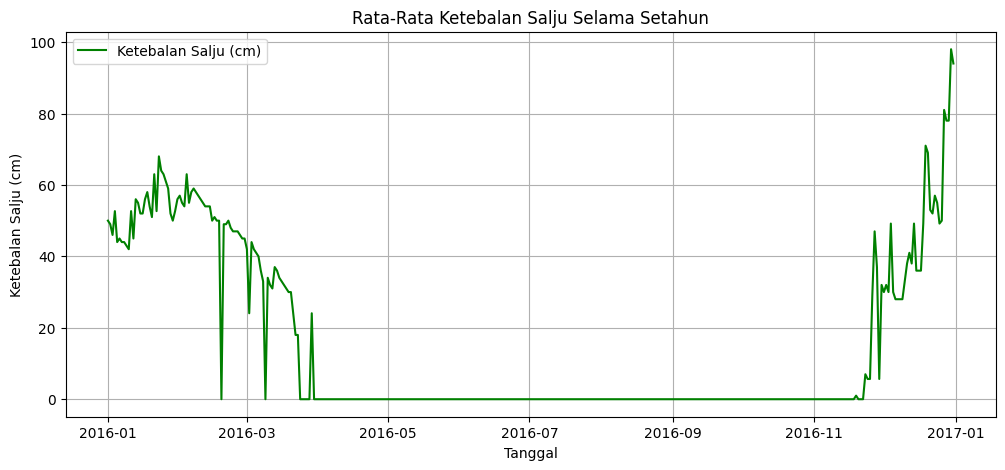

In [269]:
# Ketebalan Salju selama setahun
plt.figure(figsize=(12, 5))
plt.plot(df["Tanggal"], df["Salju_DiTanah"], label="Ketebalan Salju (cm)", color="green")
plt.xlabel("Tanggal")
plt.ylabel("Ketebalan Salju (cm)")
plt.title("Rata-Rata Ketebalan Salju Selama Setahun")
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Tanggal'>

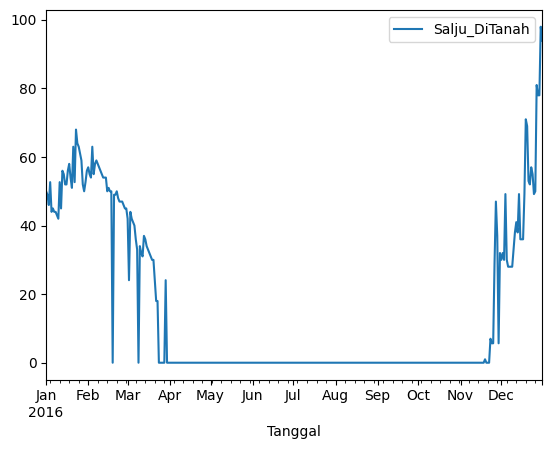

In [270]:
# Diagram Plot ketebalan salju selama setahun
df.plot(x='Tanggal', y='Salju_DiTanah', kind='line')

CHALLENGE

Tampilkan data tanggal, suhu, curah hujan, dan salju yang sesuai tanggal lahir

In [271]:
# Menampilkan data untuk tanggal 5 November
df_tgllahir = df[df["Tanggal"] == "2016-11-05"]
df_tgllahir

,Tanggal,Bulan,Suhu_RataRata,Total_Curah_Hujan,Total_Salju,Salju_DiTanah,Suhu_MA7
309,2016-11-05,11,7.8,9.0,0.0,0.0,5.6
